Unnati Surywanshi

Initial Setup and Data Loading

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [34]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
train_df = pd.read_csv("/content/drive/MyDrive/House_Price_Prediction/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/House_Price_Prediction/test.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 Exploratory Data Analysis (EDA)

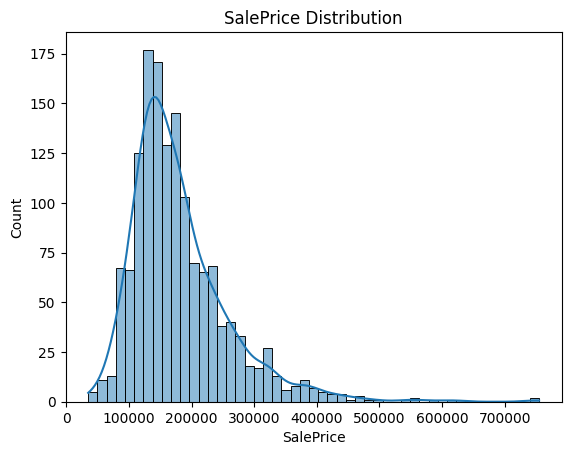

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [40]:
# Distribution of the target variable
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

# Log-transform if needed
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# Check missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(20)

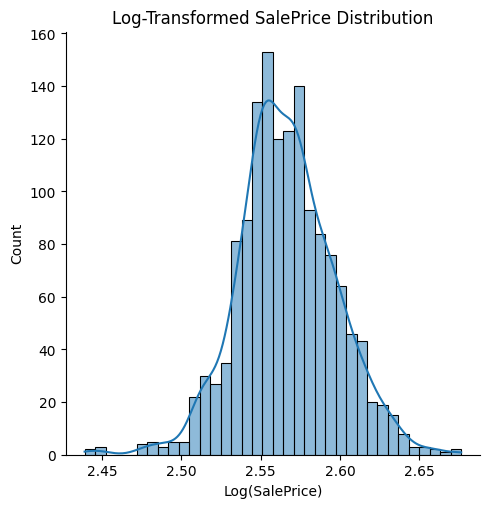

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log transform the target variable
log_saleprice = np.log1p(train_df['SalePrice'])

# Plot
sns.displot(log_saleprice, kde=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.xlabel("Log(SalePrice)")
plt.show()

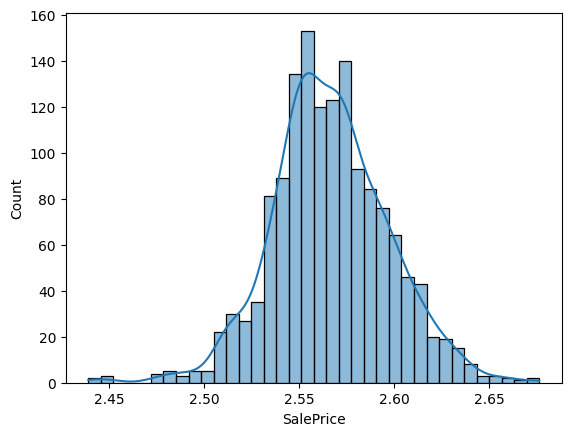

In [42]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
sns.histplot(train_df['SalePrice'],kde=True)
plt.show()

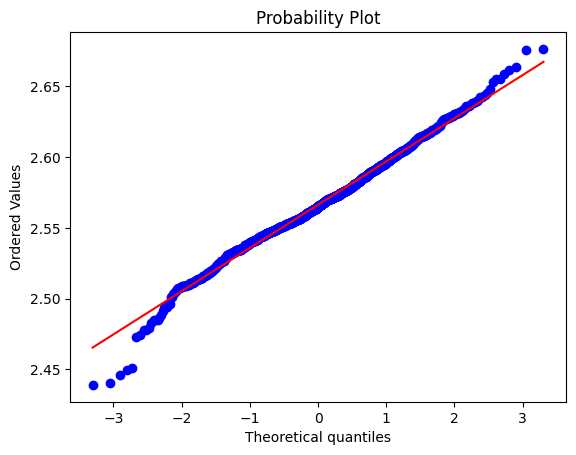

In [43]:
from scipy.stats import probplot

# Assuming train_df is already loaded and contains 'SalePrice'
# QQ Plot
probplot(train_df['SalePrice'], plot=plt)
plt.show()

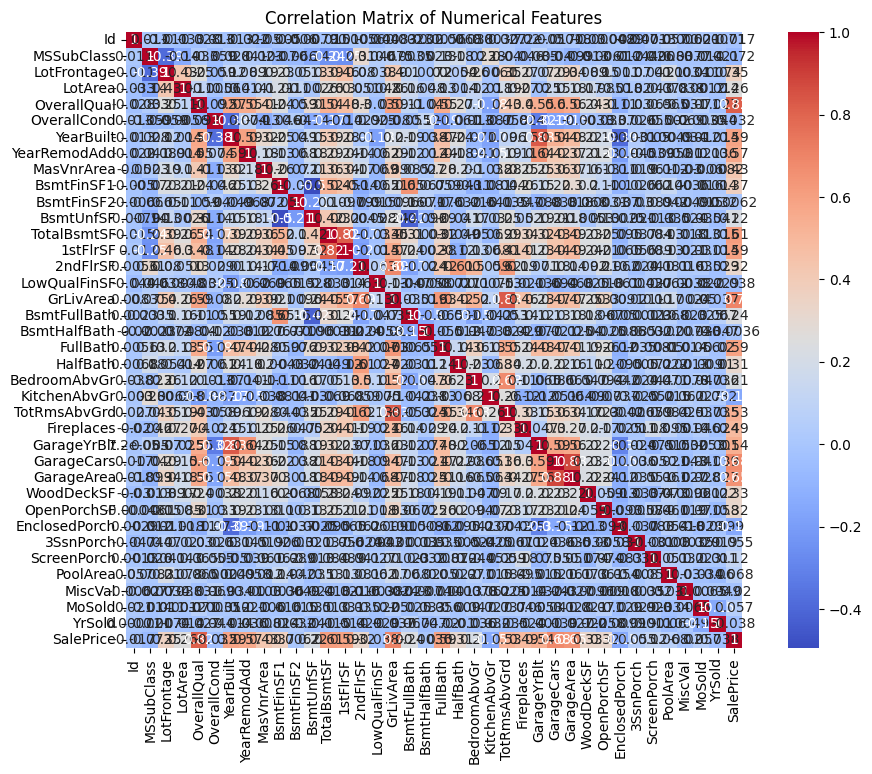

In [44]:
# Select only numerical columns from the training data
df_num = train_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = df_num.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=1.0, square=True, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

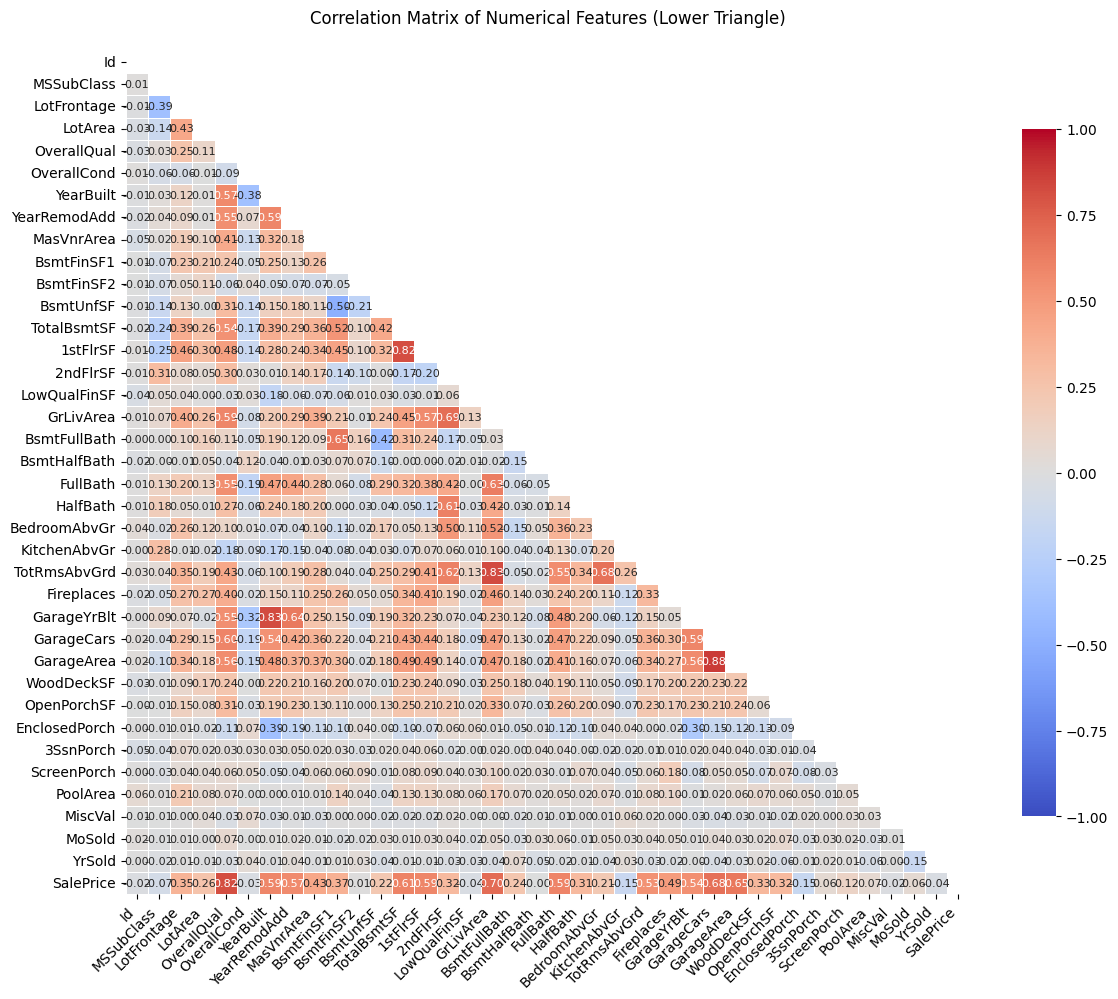

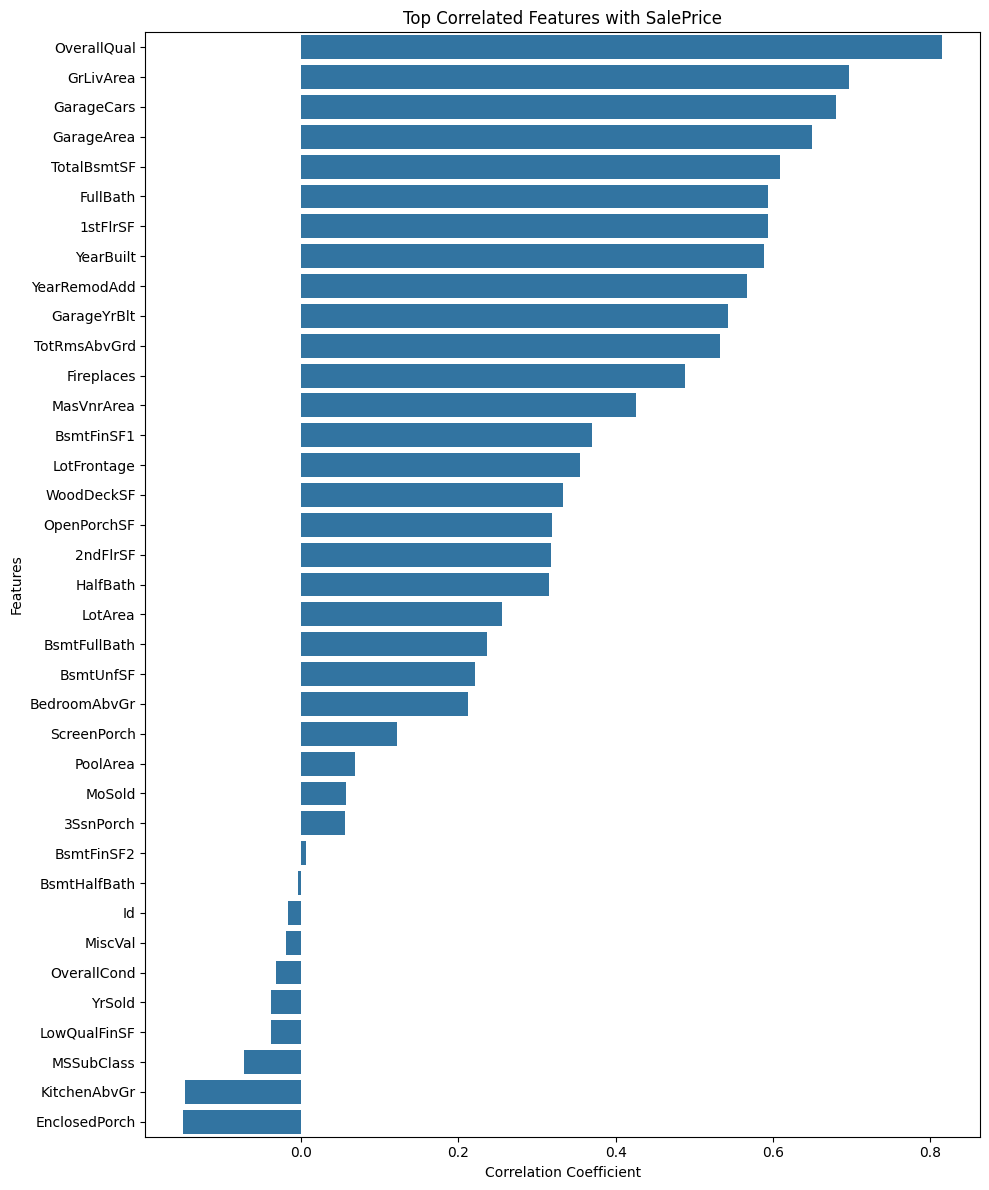

In [45]:
# Select only numerical columns from the training data
df_num = train_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = df_num.corr()

# Filter for correlations with SalePrice only (more focused analysis)
saleprice_corr = corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

# Plot settings
plt.figure(figsize=(12, 10))

# Create a mask to display only the lower triangle (avoid redundancy)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Improved heatmap
sns.heatmap(corr,
            mask=mask,
            vmin=-1.0, vmax=1.0,
            square=True,
            cmap='coolwarm',
            annot=True,
            annot_kws={'size': 8},
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Correlation Matrix of Numerical Features (Lower Triangle)", pad=20)
plt.tight_layout()
plt.show()

# Additional: Bar plot of top correlated features with SalePrice
plt.figure(figsize=(10, 12))
sns.barplot(x=saleprice_corr['SalePrice'].iloc[1:], y=saleprice_corr.index[1:])
plt.title('Top Correlated Features with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

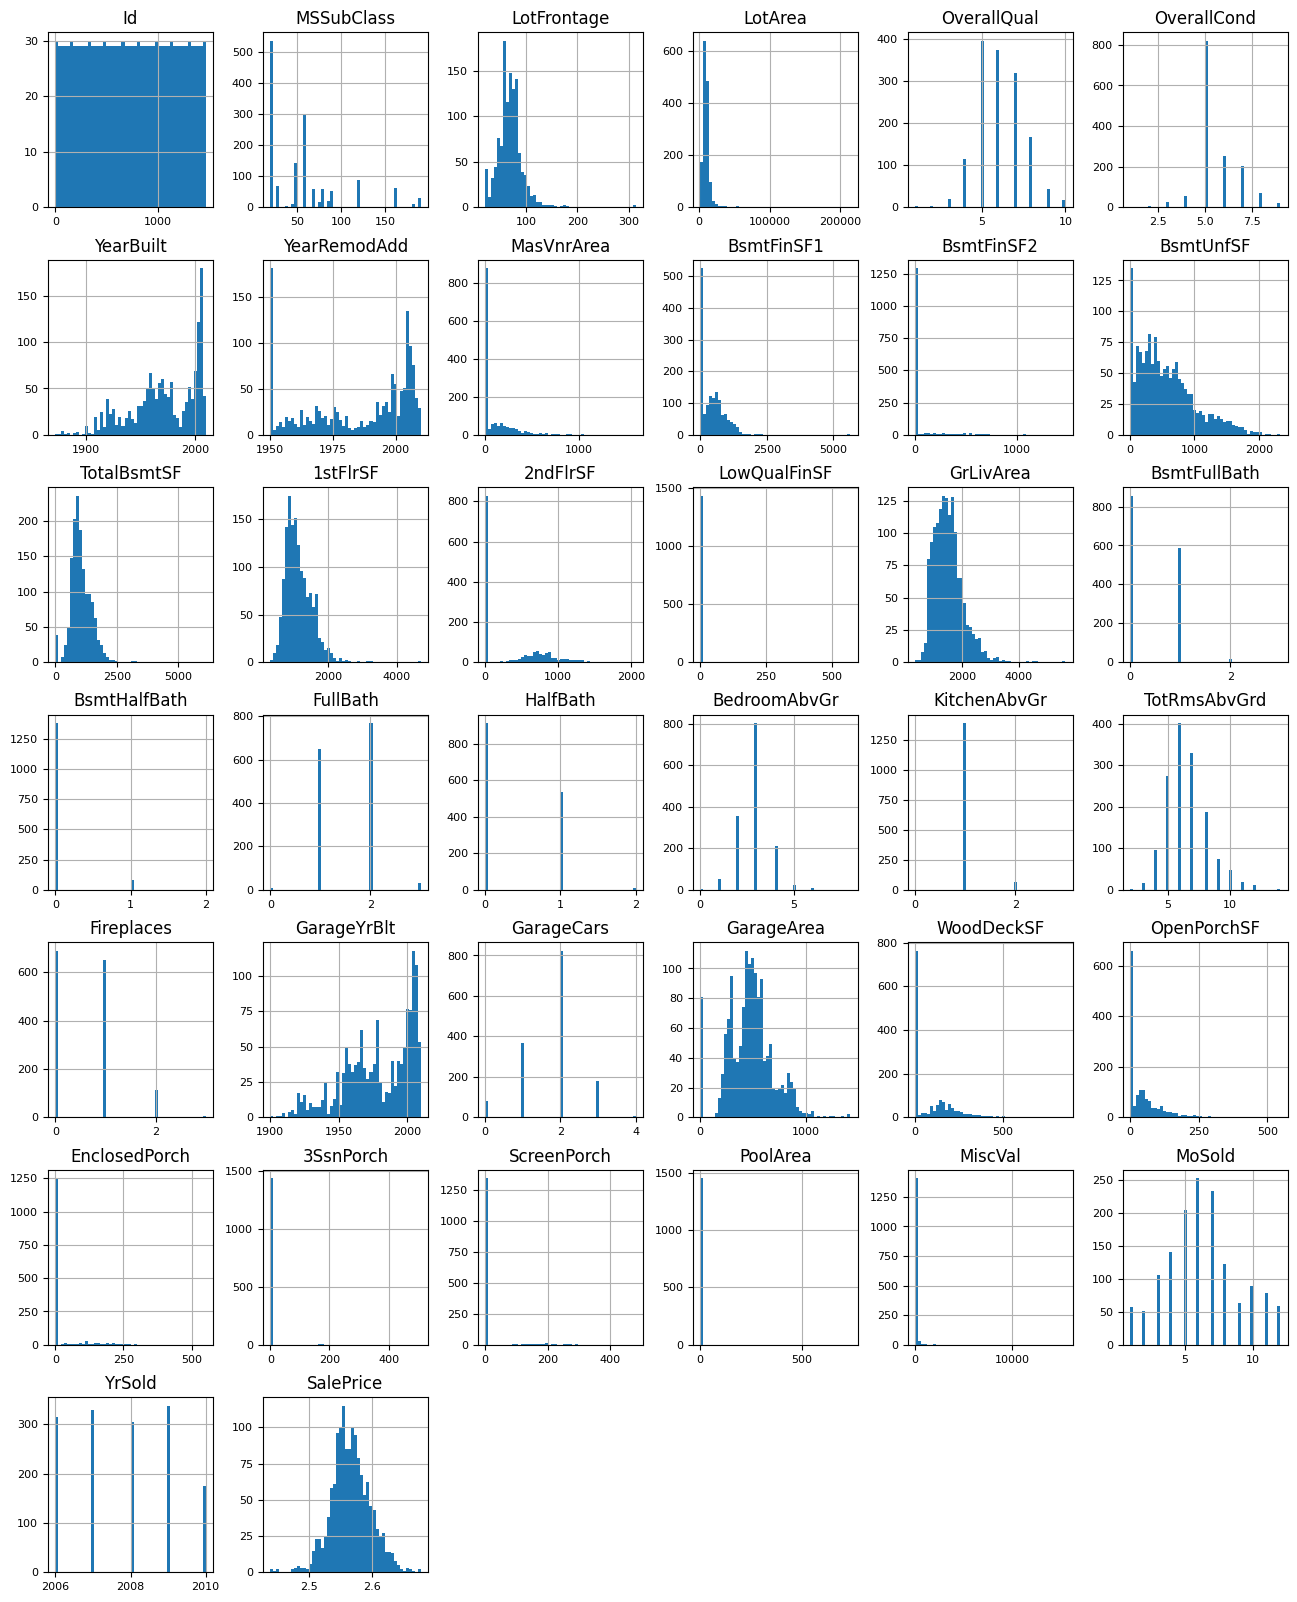

In [46]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

In [47]:
# Combine train and test data for preprocessing
train_labels = train_df['SalePrice']
train_df = train_df.drop(['SalePrice'], axis=1)

# Concatenate train and test
all_data = pd.concat([train_df, test_df], axis=0)

In [48]:
null_columns = all_data.columns[all_data.isna().any()]
columns_with_null =all_data[null_columns]
nullcounts = columns_with_null.isna().sum().sort_values(ascending=False)

# usually we ignore the columns when percentage of null values exceeds than 25%
null_percent = (nullcounts/len(all_data)) * 100
null_percent_df = pd.DataFrame({"Total":nullcounts,"Missing Ratio":null_percent})
null_percent_df

,Total,Missing Ratio
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageCond,159,5.447071


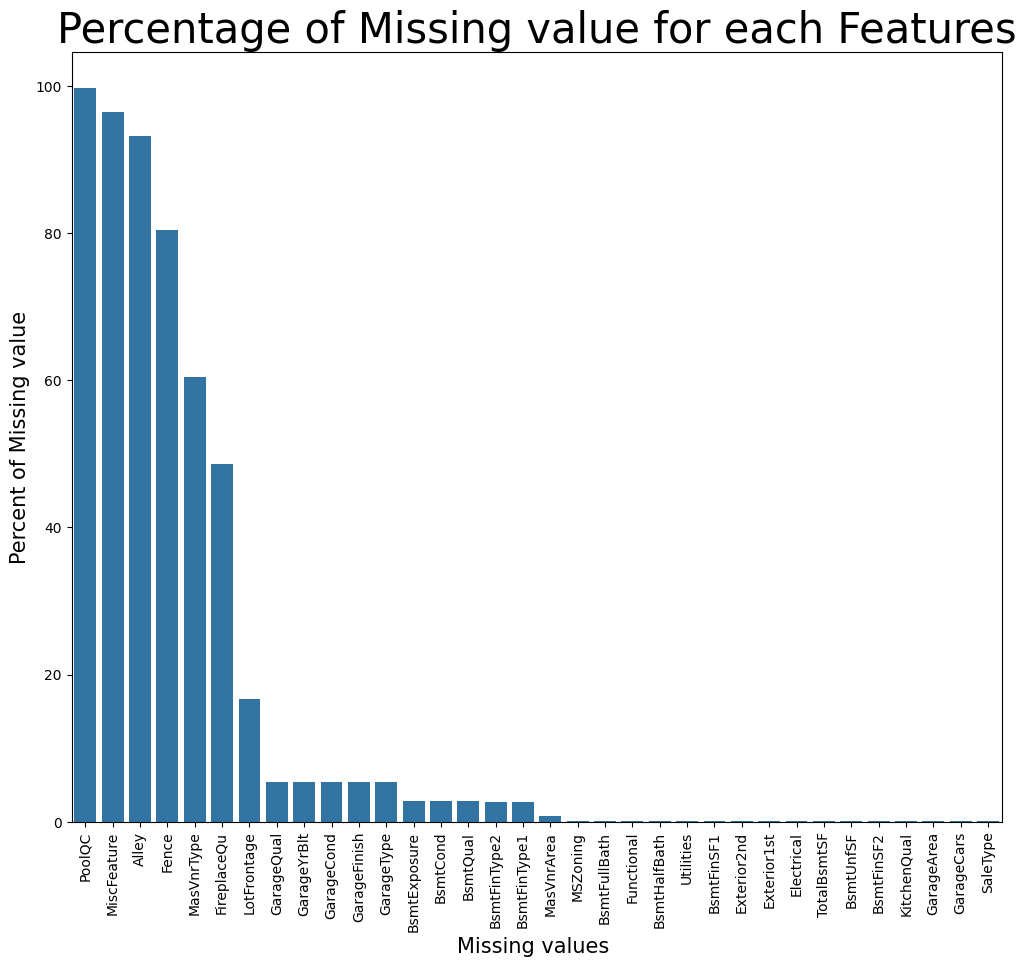

In [49]:
#visualizing the missing value by percentage
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.barplot(y=null_percent,x =null_percent.index )
plt.xlabel('Missing values ',fontsize=15)
plt.ylabel('Percent of Missing value',fontsize=15)
plt.title('Percentage of Missing value for each Features',fontsize = 30)
plt.show()

In [50]:
# Handle categorical columns
categorical_cols = all_data.select_dtypes(include='object').columns
all_data[categorical_cols] = all_data[categorical_cols].fillna("NA")

# Handle numerical columns
numerical_cols = all_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if all_data[col].isna().sum() > 0:
        all_data[col] = all_data[col].fillna(all_data[col].median())

In [51]:
import pandas as pd
import numpy as np

# Load the datasets
train_df = pd.read_csv("/content/drive/MyDrive/House_Price_Prediction/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/House_Price_Prediction/test.csv")

In [52]:
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [53]:
# Store target and IDs
y = np.log1p(train_df['SalePrice'])  # log-transform SalePrice
test_ID = test_df['Id']

# Drop Id and SalePrice
X = train_df.drop(['Id', 'SalePrice'], axis=1)
X_test = test_df.drop(['Id'], axis=1)

# Combine for preprocessing
all_data = pd.concat([X, X_test], axis=0)

# Fill missing values
categorical_cols = all_data.select_dtypes(include='object').columns
numerical_cols = all_data.select_dtypes(include=['int64', 'float64']).columns

all_data[categorical_cols] = all_data[categorical_cols].fillna("NA")
all_data[numerical_cols] = all_data[numerical_cols].apply(lambda col: col.fillna(col.median()))

# One-hot encode
all_data = pd.get_dummies(all_data)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_data_scaled = pd.DataFrame(scaler.fit_transform(all_data), columns=all_data.columns)

# Split back to train and test
X_all = all_data_scaled.iloc[:len(y), :]
X_final_test = all_data_scaled.iloc[len(y):, :]

In [70]:
# STEP 4: One-Hot Encoding
all_data = pd.get_dummies(all_data)

# STEP 5: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_data_scaled = pd.DataFrame(scaler.fit_transform(all_data), columns=all_data.columns)

# STEP 6: Re-split into train and test
X_all = all_data_scaled.iloc[:len(y), :]
X_final_test = all_data_scaled.iloc[len(y):, :]

# STEP 7: Train/Validation Split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_all, y, test_size=0.2, random_state=42)

# STEP 8:  Model Building and Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def model_evaluation(y_test, y_pred, tolerance=0.1):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    within_tolerance = np.abs(y_test - y_pred) <= (tolerance * y_test)
    accuracy = np.mean(within_tolerance) * 100

    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# No tuning, just 1st-degree poly features
best_linear_model = Pipeline([
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('linreg', LinearRegression(fit_intercept=True))
])

best_linear_model.fit(X_train, y_train)
y_pred_valid = best_linear_model.predict(X_valid)

# Evaluation
model_evaluation(y_valid, y_pred_valid)

R2 Score: 0.9089
MSE: 0.0170
RMSE: 0.1304
MAE: 0.0898


In [56]:
  from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso

# Lighter set of base learners
estimators = [
    ('ridge', Ridge(alpha=10)),
    ('lasso', Lasso(alpha=0.001, max_iter=10000)),
    ('linear', best_linear_model)
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=5),
    n_jobs=-1
)

stack.fit(X_train, y_train)
y_pred_valid_stack = stack.predict(X_valid)

# Evaluation
print("\n🔁 Stacking Regressor Performance:")
model_evaluation(y_valid, y_pred_valid_stack)


🔁 Stacking Regressor Performance:
R2 Score: 0.9129
MSE: 0.0163
RMSE: 0.1275
MAE: 0.0884


In [61]:
# Predict on the final test set
y_pred_test = stack.predict(X_final_test)

# Convert from log scale back to actual prices
y_pred_test = np.expm1(y_pred_test)
submission = pd.DataFrame({'Id': test_ID, 'SalePrice': y_pred_test})
submission.to_csv('submission.csv', index=False)
